**1. Import các thư viện cần thiết**

In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

**2. Đọc file dữ liệu chứng khoán công ty Microsoft và chia dataset theo tỉ lệ 7:2:1**

In [2]:
# Đọc file dữ liệu
df = pd.read_csv('D:/IS403_O21_HTCL_15/Dataset/GOOG.csv')
df = df[['Date','Close']]
df['Date'] = pd.to_datetime(df['Date'])

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size + 1]

print(train_data)
print(test_data)

           Date      Close
0    2018-03-01  53.476002
1    2018-03-02  53.945999
2    2018-03-05  54.546501
3    2018-03-06  54.752998
4    2018-03-07  55.481998
...         ...        ...
1254 2023-02-23  91.070000
1255 2023-02-24  89.349998
1256 2023-02-27  90.099998
1257 2023-02-28  90.300003
1258 2023-03-01  90.510002

[1259 rows x 2 columns]
           Date       Close
1259 2023-03-02   92.309998
1260 2023-03-03   94.019997
1261 2023-03-06   95.580002
1262 2023-03-07   94.169998
1263 2023-03-08   94.650002
...         ...         ...
1569 2024-05-24  176.330002
1570 2024-05-28  178.020004
1571 2024-05-29  177.399994
1572 2024-05-30  173.559998
1573 2024-05-31  173.960007

[315 rows x 2 columns]


**Xem** **lại** **dataset**

In [3]:
df

,Date,Close
0,2018-03-01,53.476002
1,2018-03-02,53.945999
2,2018-03-05,54.546501
3,2018-03-06,54.752998
4,2018-03-07,55.481998
...,...,...
1569,2024-05-24,176.330002
1570,2024-05-28,178.020004
1571,2024-05-29,177.399994
1572,2024-05-30,173.559998


**3. Dùng model ARIMA để train data**

In [4]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])
# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, seasonal = False)
# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5061.810, Time=1.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5061.531, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5058.859, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5058.710, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5059.865, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5057.813, Time=0.51 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5059.606, Time=0.88 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5059.626, Time=0.82 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5060.361, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5060.595, Time=0.42 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5056.304, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5057.091, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5057.235, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=5058.110, Time=0.68 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

**4. Quá trình test**

In [5]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test)+90,typ='levels', dynamic=True)

**6. Quá trình tạo index predict 30 ngày tiếp theo**

In [6]:

# Dự đoán cho 90 ngày tiếp theo
n_days = 90

# Lấy ngày cuối cùng của dữ liệu hiện tại
last_date = df['Date'].iloc[-1]

# Tạo một khoảng thời gian mới cho 90 ngày tiếp theo
next_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_days)


# In ra giá trị dự đoán
print('Predicted closing prices for the next 90 days:')
# print(y_next_days)
print(next_dates)

Predicted closing prices for the next 90 days:
DatetimeIndex(['2024-06-01', '2024-06-02', '2024-06-03', '2024-06-04',
               '2024-06-05', '2024-06-06', '2024-06-07', '2024-06-08',
               '2024-06-09', '2024-06-10', '2024-06-11', '2024-06-12',
               '2024-06-13', '2024-06-14', '2024-06-15', '2024-06-16',
               '2024-06-17', '2024-06-18', '2024-06-19', '2024-06-20',
               '2024-06-21', '2024-06-22', '2024-06-23', '2024-06-24',
               '2024-06-25', '2024-06-26', '2024-06-27', '2024-06-28',
               '2024-06-29', '2024-06-30', '2024-07-01', '2024-07-02',
               '2024-07-03', '2024-07-04', '2024-07-05', '2024-07-06',
               '2024-07-07', '2024-07-08', '2024-07-09', '2024-07-10',
               '2024-07-11', '2024-07-12', '2024-07-13', '2024-07-14',
               '2024-07-15', '2024-07-16', '2024-07-17', '2024-07-18',
               '2024-07-19', '2024-07-20', '2024-07-21', '2024-07-22',
               '2024-07-23', '

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Đánh giá MAE
mae = mean_absolute_error(test_data['Close'], y_pred[:len(test_data)])
print("Mean Absolute Error (MAE):", mae)

# Đánh giá MSE
mse = mean_squared_error(test_data['Close'], y_pred[:len(test_data)])
print("Mean Squared Error (MSE):", mse)

# Đánh giá RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Đánh giá MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data['Close'], y_pred[:len(test_data)])
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 43.35315202768594
Mean Squared Error (MSE): 2242.131136897719
Root Mean Squared Error (RMSE): 47.35114715503436
Mean Absolute Percentage Error (MAPE): 30.924360202758027


***7.Đánh giá độ chính xác thuật toán***

**8. Vẽ biểu đồ**

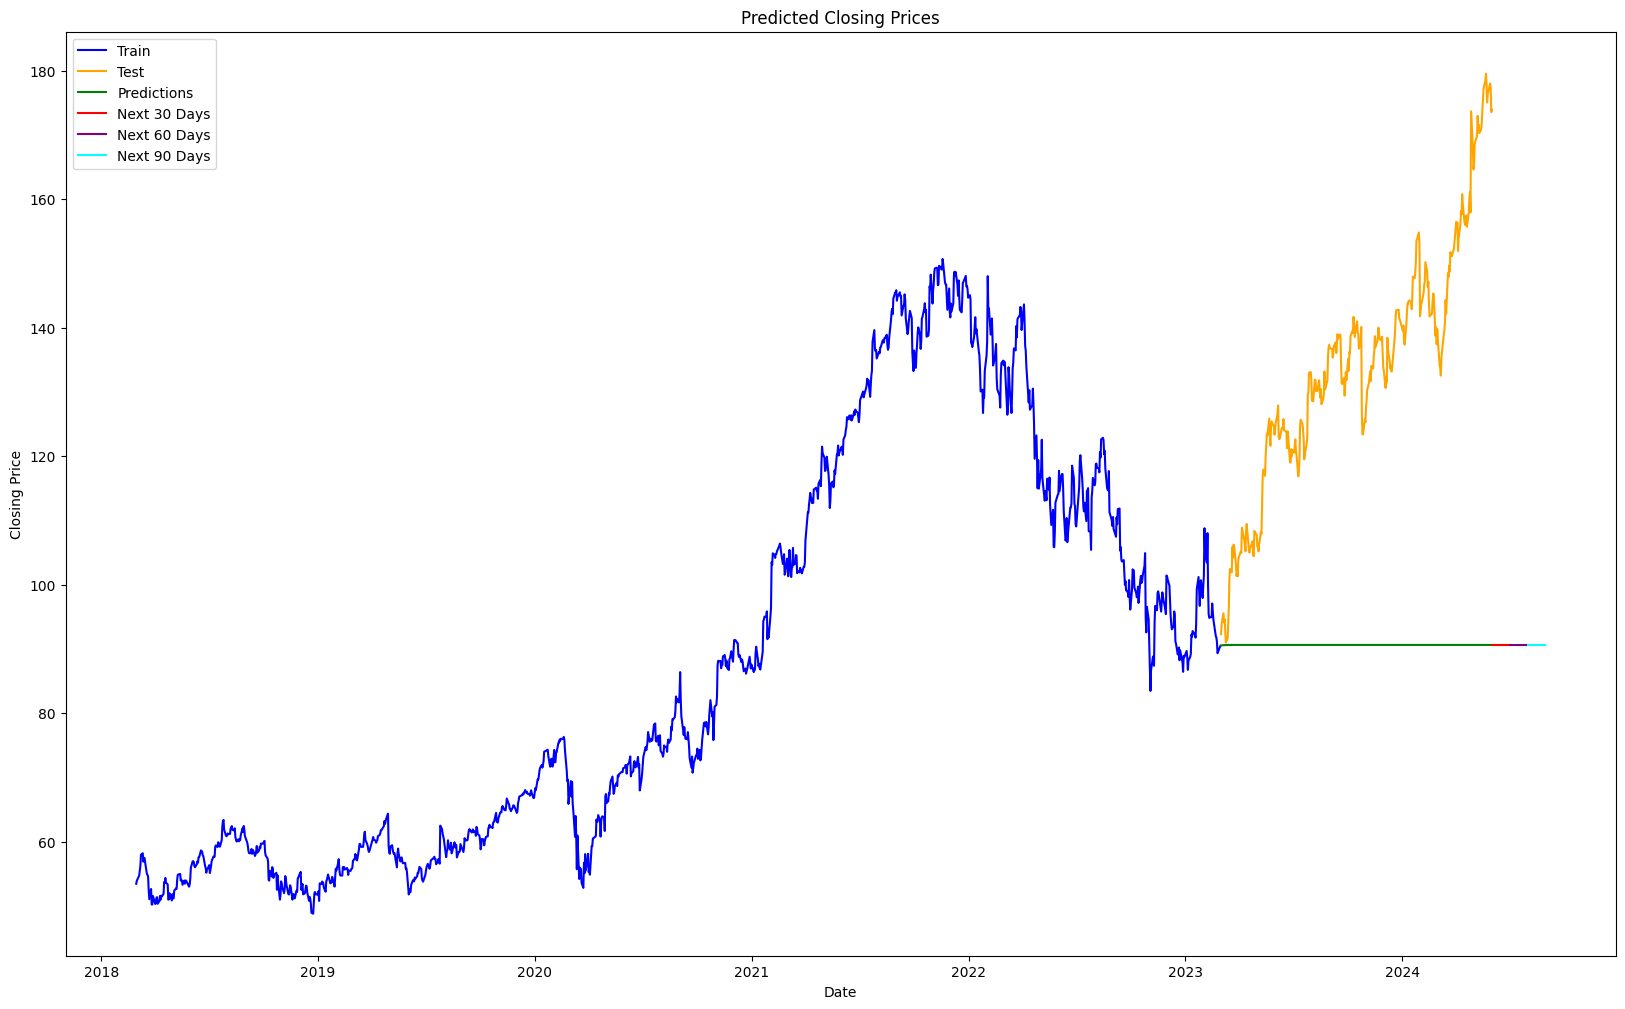

In [8]:

# Vẽ biểu đồ
plt.figure(figsize=(20, 12))

# Vẽ dữ liệu huấn luyện
plt.plot(train_data['Date'], train_data['Close'], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra
plt.plot(test_data['Date'], test_data['Close'], label='Test', color='orange')

# Vẽ giá trị dự đoán cho dữ liệu kiểm tra
plt.plot(test_data['Date'], y_pred[:len(test_data)], label='Predictions', color='green')


next_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_days)


plt.plot(next_dates[:30], y_pred[len(test_data):len(test_data)+30], label='Next 30 Days', color='red')
plt.plot(next_dates[30:60], y_pred[len(y_test)+30:len(y_test)+60], label='Next 60 Days', color='purple')
plt.plot(next_dates[60:90], y_pred[len(y_test)+60:len(y_test)+90], label='Next 90 Days', color='cyan')

# Thêm tiêu đề và nhãn
plt.title('Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()